# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | arraial do cabo.
City not found...skipping arraial do cabo.
Processing Record 1  of Set 1 | cape town.
City not found...skipping cape town.
Processing Record 2  of Set 1 | ushuaia.
City not found...skipping ushuaia.
Processing Record 3  of Set 1 | lekoni.
City not found...skipping lekoni.
Processing Record 4  of Set 1 | busselton.
City not found...skipping busselton.
Processing Record 5  of Set 1 | matata.
City not found...skipping matata.
Processing Record 6  of Set 1 | portland.
City not found...skipping portland.
Processing Record 7  of Set 1 | punta arenas.
City not found...skipping punta arenas.
Processing Record 8  of Set 1 | auki.
City not found...skipping auki.
Processing Record 9  of Set 1 | solginskiy.
City not found...skipping solginskiy.
Processing Record 10  of Set 1 | kapaa.
City not found...skipping kapaa.
Processing Record 11  of Set 1 | coruripe.
City not found...skipping coruripe.
P

Processing Record 3  of Set 3 | beringovskiy.
City not found...skipping beringovskiy.
Processing Record 4  of Set 3 | ostrovnoy.
City not found...skipping ostrovnoy.
Processing Record 5  of Set 3 | okha.
City not found...skipping okha.
Processing Record 6  of Set 3 | palabuhanratu.
City not found...skipping palabuhanratu.
Processing Record 7  of Set 3 | mackenzie.
City not found...skipping mackenzie.
Processing Record 8  of Set 3 | tasiilaq.
City not found...skipping tasiilaq.
Processing Record 9  of Set 3 | beloha.
City not found...skipping beloha.
Processing Record 10  of Set 3 | buariki.
City not found...skipping buariki.
Processing Record 11  of Set 3 | cabo san lucas.
City not found...skipping cabo san lucas.
Processing Record 12  of Set 3 | dom pedrito.
City not found...skipping dom pedrito.
Processing Record 13  of Set 3 | makakilo city.
City not found...skipping makakilo city.
Processing Record 14  of Set 3 | carlsbad.
City not found...skipping carlsbad.
Processing Record 15  o

Processing Record 9  of Set 5 | petropavlovsk-kamchatskiy.
City not found...skipping petropavlovsk-kamchatskiy.
Processing Record 10  of Set 5 | pisco.
City not found...skipping pisco.
Processing Record 11  of Set 5 | steamboat springs.
City not found...skipping steamboat springs.
Processing Record 12  of Set 5 | bambanglipuro.
City not found...skipping bambanglipuro.
Processing Record 13  of Set 5 | victoria.
City not found...skipping victoria.
Processing Record 14  of Set 5 | nouakchott.
City not found...skipping nouakchott.
Processing Record 15  of Set 5 | carutapera.
City not found...skipping carutapera.
Processing Record 16  of Set 5 | casablanca.
City not found...skipping casablanca.
Processing Record 17  of Set 5 | luwuk.
City not found...skipping luwuk.
Processing Record 18  of Set 5 | hirara.
City not found...skipping hirara.
Processing Record 19  of Set 5 | san quintin.
City not found...skipping san quintin.
Processing Record 20  of Set 5 | adrar.
City not found...skipping ad

Processing Record 15  of Set 7 | longyearbyen.
City not found...skipping longyearbyen.
Processing Record 16  of Set 7 | kardla.
City not found...skipping kardla.
Processing Record 17  of Set 7 | dumas.
City not found...skipping dumas.
Processing Record 18  of Set 7 | san carlos de bariloche.
City not found...skipping san carlos de bariloche.
Processing Record 19  of Set 7 | solano.
City not found...skipping solano.
Processing Record 20  of Set 7 | berezovyy.
City not found...skipping berezovyy.
Processing Record 21  of Set 7 | ugljevik.
City not found...skipping ugljevik.
Processing Record 22  of Set 7 | kruisfontein.
City not found...skipping kruisfontein.
Processing Record 23  of Set 7 | tautira.
City not found...skipping tautira.
Processing Record 24  of Set 7 | lichuan.
City not found...skipping lichuan.
Processing Record 25  of Set 7 | kushiro.
City not found...skipping kushiro.
Processing Record 26  of Set 7 | gualaceo.
City not found...skipping gualaceo.
Processing Record 27  of

Processing Record 20  of Set 9 | chumikan.
City not found...skipping chumikan.
Processing Record 21  of Set 9 | paita.
City not found...skipping paita.
Processing Record 22  of Set 9 | ambon.
City not found...skipping ambon.
Processing Record 23  of Set 9 | awbari.
City not found...skipping awbari.
Processing Record 24  of Set 9 | cockburn town.
City not found...skipping cockburn town.
Processing Record 25  of Set 9 | eltham.
City not found...skipping eltham.
Processing Record 26  of Set 9 | oistins.
City not found...skipping oistins.
Processing Record 27  of Set 9 | yarmolyntsi.
City not found...skipping yarmolyntsi.
Processing Record 28  of Set 9 | ekhabi.
City not found...skipping ekhabi.
Processing Record 29  of Set 9 | tabiauea.
City not found...skipping tabiauea.
Processing Record 30  of Set 9 | ayorou.
City not found...skipping ayorou.
Processing Record 31  of Set 9 | port blair.
City not found...skipping port blair.
Processing Record 32  of Set 9 | chivay.
City not found...skip

Processing Record 23  of Set 11 | dingalan.
City not found...skipping dingalan.
Processing Record 24  of Set 11 | brae.
City not found...skipping brae.
Processing Record 25  of Set 11 | along.
City not found...skipping along.
Processing Record 26  of Set 11 | siocon.
City not found...skipping siocon.
Processing Record 27  of Set 11 | choix.
City not found...skipping choix.
Processing Record 28  of Set 11 | gilazi.
City not found...skipping gilazi.
Processing Record 29  of Set 11 | sistranda.
City not found...skipping sistranda.
Processing Record 30  of Set 11 | toba tek singh.
City not found...skipping toba tek singh.
Processing Record 31  of Set 11 | glace bay.
City not found...skipping glace bay.
Processing Record 32  of Set 11 | maxixe.
City not found...skipping maxixe.
Processing Record 33  of Set 11 | tynda.
City not found...skipping tynda.
Processing Record 34  of Set 11 | kulhudhuffushi.
City not found...skipping kulhudhuffushi.
Processing Record 35  of Set 11 | zlobin.
City not

Processing Record 27  of Set 13 | ziro.
City not found...skipping ziro.
Processing Record 28  of Set 13 | dudinka.
City not found...skipping dudinka.
Processing Record 29  of Set 13 | padang.
City not found...skipping padang.
Processing Record 30  of Set 13 | kribi.
City not found...skipping kribi.
Processing Record 31  of Set 13 | kirknewton.
City not found...skipping kirknewton.
Processing Record 32  of Set 13 | oussouye.
City not found...skipping oussouye.
Processing Record 33  of Set 13 | tanout.
City not found...skipping tanout.
Processing Record 34  of Set 13 | soe.
City not found...skipping soe.
Processing Record 35  of Set 13 | general roca.
City not found...skipping general roca.
Processing Record 36  of Set 13 | kindu.
City not found...skipping kindu.
Processing Record 37  of Set 13 | kahului.
City not found...skipping kahului.
Processing Record 38  of Set 13 | hastings.
City not found...skipping hastings.
Processing Record 39  of Set 13 | garowe.
City not found...skipping ga

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Data Count
weather_df.count()

City                641
Country             641
Date                641
Latitude            641
Longitude           641
Cloudiness (%)      641
Humidity (%)        641
Max Temp (F)        641
Wind Speed (mph)    641
dtype: int64

In [5]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,arraial do cabo,,,,,,,,
1,cape town,,,,,,,,
2,ushuaia,,,,,,,,
3,lekoni,,,,,,,,
4,busselton,,,,,,,,


In [6]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


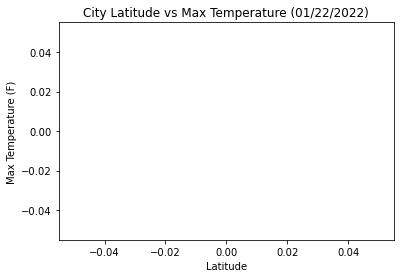

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")

## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


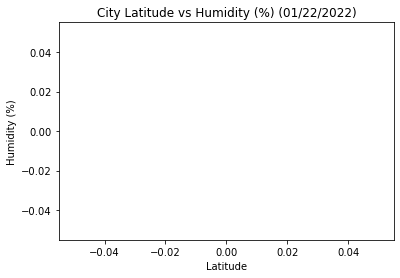

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


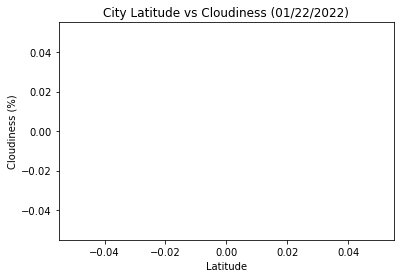

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


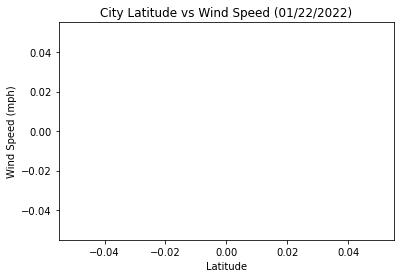

In [12]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()